## 12. BJT Dynamic Response Modeling
### 12.1 Small-signal equivalent circuits
### 12.1.1 Generalized two-port model
### 12.1.2 Hybrid-pi models
### 12.2 Transient (switching) response
### 12.2.1 Qualitative Observations
### 12.2.2 Charge control relationships
### 12.2.3 Quantitative Analysis
#### Turn-on Transient
#### Turn-off Transient
### 12.2.4 Practical considerations
### 12.3 Summary

In [9]:
# Problem 12.3 
# Fig 11.5 page 409 common emitter pnp BJT characteristics experiment Ic vs VEC, VEC=10V, IC=1.1mA
# Fig 12.2 page 447 Hybrid-pi equivalent circuits (a), eq. 12.9a page 448
# gm=qIC/kT
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt
T=300
IC=1.1e-3
kT=k*T
IB=5e-6
gm=IC/kT
rpi=kT/IB
print(f"gm={gm:.2e}S, rpi={rpi:.2e}ohm")

gm=4.26e-02S, rpi=5.17e+03ohm


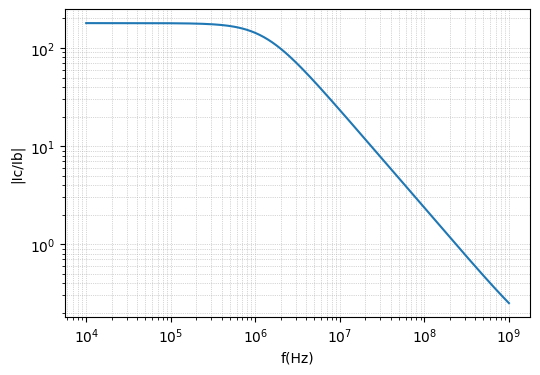

In [18]:
# Problem 12.6 fT determination
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

gm=3.86e-2; rpi=4.65e3; ro=2e4; rmu=3.59e6
Ceb=23.6e-12; Ccb=2.32e-12
rb=10; rc=2.8; re=0

#|ic/ib| vs frequency
f=np.logspace(4,9,201)
w=2*np.pi*f
Y1=1/rpi+1j*w*Ceb
Y2=1/rmu+1j*w*Ccb
R=(Y2-gm)/(Y1+Y2)
Den=(R*rc*Y2)-(Y2+1/ro)*rc-1
beta=np.abs(R/Den) # beta=|ic/ib|

plt.figure(figsize=(6, 4))
plt.loglog(f,beta)
plt.xlabel("f(Hz)"), plt.ylabel("|Ic/Ib|")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.show()

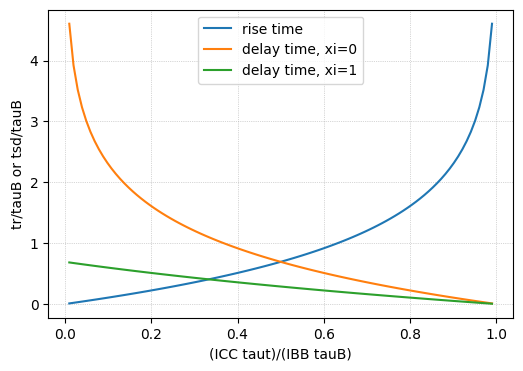

In [34]:
# Problem 12.9 Rise and Storage-Delay times
# eq. 12.27 page 455 tr/tauB=ln(1/(1-x), x=ICC*tr/(IBB*tauB)
# eq. 12.32 page 457 tsd/tauB=ln(1/x) if xi=0, ln(2/(1+x) if xi=1
# xi=0 vs=0 and iB~0 during turn-off transit, xi=1 vs=-Vx and iB~-IBB.
# tr: base transit time, tauB: thee average lifetime of an excess minority carrier

from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

#Rise time computation
x=np.linspace(0.01,0.99,101)
rise=np.log(1/(1-x)) # rise=tr/tauB, x=ICC*tr/(IBB*tauB)
#Storage-Delay time computation
delay0=np.log(1/x) #delay0=tsd/tauB, xi=0
delay1=np.log(2/(1+x)) #delay1=tsd/tauB, xi=1

plt.figure(figsize=(6, 4))
plt.plot(x,rise,label="rise time")
plt.plot(x,delay0,label="delay time, xi=0")
plt.plot(x,delay1,label="delay time, xi=1")
plt.xlabel("(ICC taut)/(IBB tauB)"), plt.ylabel("tr/tauB or tsd/tauB")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

falling time
$$t_f=t2-t1=\tau_B ln\left(\frac{0.9I_{CC} \tau_t/I_{BB} \tau_B + \xi}{0.1I_{CC} \tau_t/I_{BB} \tau_B + \xi} \right)=\tau_B ln\left(\frac{0.9x+\xi}{0.1x+\xi}\right) $$
where $x=I_{CC} \tau_t/I_{BB} \tau_B$, \
$\xi=0$ $\tau_t/\tau_B=ln9$\
$\xi=1$ $\tau_t/\tau_B=ln\left(\frac{0.9x+1}{0.1x+1}\right)$\
xi=0 vs=0 and iB$\sim$0 during turn-off transit, xi=1 vs=-Vx and iB$\sim$-IBB.

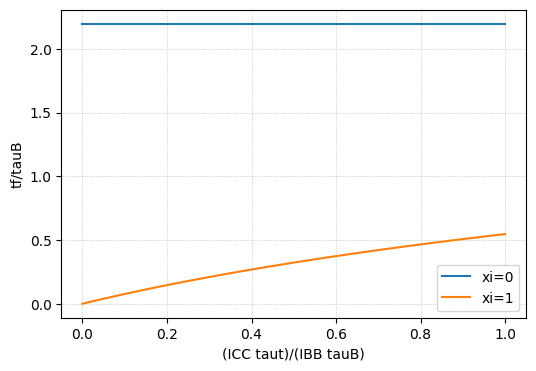

In [32]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

x0=[0,1]
y0=[np.log(9),np.log(9)]
x1=np.linspace(0,1)
y1=np.log((0.9*x1+1)/(0.1*x1+1))

plt.figure(figsize=(6, 4))
plt.plot(x0,y0,label="xi=0")
plt.plot(x1,y1,label="xi=1")
plt.xlabel("(ICC taut)/(IBB tauB)"), plt.ylabel("tf/tauB")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()